## Retrieving dataset from an S3 Bucket

In [8]:
import boto3
import pandas as pd; pd.set_option('display.max_column', 100)
import numpy as np


## define bucket in which you are trying to reach
s3 = boto3.resource('s3')
bucket_name = 'daltondencklau-data445-bucket'
bucket = s3.Bucket(bucket_name)


## define csv file to read in the bucket
file_key= 'Real_Estate.csv'

## syntax to allow us to read the file
bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## reading the data file
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Dropping the 'No' and 'transaction_date' column

In [9]:
house_price = house_price.drop(columns = ['No', 'transaction_date'], axis =1)
house_price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


## Splitting data into 80% training and 20% testing

In [10]:
## so that we can test/evaluate our model
from sklearn.model_selection import train_test_split

## defining input and target variables
X = house_price.drop(columns = 'house_price_of_unit_area', axis =1)
## ^^ taking everything but house price of unit area

Y = house_price['house_price_of_unit_area']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2)

## Building Simple Linear Regression Model

In [11]:
## only building the model to test on training dataset

from sklearn.linear_model import LinearRegression
lm_md = LinearRegression().fit(X_train, Y_train)

## Predicting on Test Dataset

In [13]:
lm_preds = lm_md.predict(X_test)
lm_preds

array([42.59220579, 43.07254619, 54.08793222, 43.17426046, 30.61440301,
       46.57140977, 52.14156155, 31.90903213, 13.59690975, 41.92089513,
       41.76125311, 24.21803202, 50.78991952, 45.4805851 , 13.22018411,
        6.61526596, 42.16786411, 31.35858525, 10.30664627, 10.8544458 ,
       12.46182419, 44.68166103, 39.13578742, 50.11186319, 33.88511453,
        8.40400241, 42.25203902, 37.56569343, 31.70057997, 12.32615545,
       43.67221837, 45.34939712, 46.28181589, 47.61708548, 35.77381915,
       40.33542487, 43.19649572, 43.73706938, 26.60373811, 52.40027662,
       49.04812558, 35.78679069, 11.1370356 , 47.69705725, 37.58698276,
       41.17887811, 45.24296911, 38.18483028, 50.09358955, 39.83549142,
       48.85421073, 47.52236158, 45.34939712, 42.83513815, 41.13369244,
       14.03317992, 48.90742473, 35.67124335, 46.29204038, 27.67430046,
       40.08654653, 40.67740634, 42.14703395, 31.40453014, 46.23882637,
       36.62910562, 13.62351675, 39.46904235, 48.50138967, 42.30

## comparing model values vs. actual values

<function matplotlib.pyplot.show(close=None, block=None)>

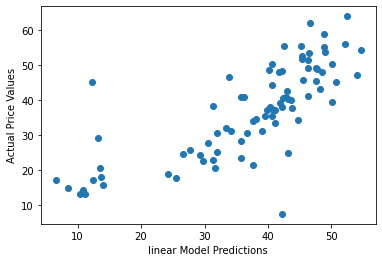

In [21]:
import matplotlib.pyplot as plt
plt.scatter(lm_preds, Y_test)
plt.xlabel('linear Model Predictions')
plt.ylabel('Actual Price Values')
plt.show

## Calculating MSE

In [23]:
## average of squared differences AVG((Actual - predictions)^2)
np.mean((Y_test -lm_preds)**2)

## compare this MSE to another model's MSE (you prefer a model with a lower MSE)

75.03785266338949